In [2]:
import numpy as np
import pandas as pd
import xarray as xr
import datetime

from erddapy import ERDDAP

import os
curdir = os.getcwd()
os.chdir(os.path.join(curdir, 'python_tools', 'script_versions'))
import ERDDAP_Access as erd_access
os.chdir(curdir)

import matplotlib
from matplotlib import pyplot as plt

In [22]:
for ii in range(2020,2024):
    print(ii)
    
    constraints = {
        "cast_start_time>=": datetime.datetime(ii,1,1,0,0,0).strftime('%Y-%m-%dT%H:%M:%SZ'),
        "cast_start_time<": datetime.datetime(ii+1,1,1,0,0,0).strftime('%Y-%m-%dT%H:%M:%SZ'),
        "sea_water_temperature_qc_agg<=": 3,
        "sea_water_practical_salinity_qc_agg<=": 3
    }
    
    print(constraints)

2020
{'cast_start_time>=': '2020-01-01T00:00:00Z', 'cast_start_time<': '2021-01-01T00:00:00Z', 'sea_water_temperature_qc_agg<=': 3, 'sea_water_practical_salinity_qc_agg<=': 3}
2021
{'cast_start_time>=': '2021-01-01T00:00:00Z', 'cast_start_time<': '2022-01-01T00:00:00Z', 'sea_water_temperature_qc_agg<=': 3, 'sea_water_practical_salinity_qc_agg<=': 3}
2022
{'cast_start_time>=': '2022-01-01T00:00:00Z', 'cast_start_time<': '2023-01-01T00:00:00Z', 'sea_water_temperature_qc_agg<=': 3, 'sea_water_practical_salinity_qc_agg<=': 3}
2023
{'cast_start_time>=': '2023-01-01T00:00:00Z', 'cast_start_time<': '2024-01-01T00:00:00Z', 'sea_water_temperature_qc_agg<=': 3, 'sea_water_practical_salinity_qc_agg<=': 3}


In [24]:
#########
# Load Hoodsport (ORCA2) data

erddap_url = 'http://nwem.apl.washington.edu/erddap/'
orca_dataset = 'orca2_L3_depthgridded_100'

variables = [
            "sea_water_temperature",
            "sea_water_temperature_qc_agg",
            "sea_water_practical_salinity",
            "sea_water_practical_salinity_qc_agg",
            "sea_water_sigma_theta",
            "sea_water_sigma_theta_qc_agg",
            "mass_concentration_of_oxygen_in_sea_water",
            "mass_concentration_of_oxygen_in_sea_water_qc_agg",
            "fractional_saturation_of_oxygen_in_sea_water",
            "mass_concentration_of_chlorophyll_a_in_sea_water",
            "mass_concentration_of_chlorophyll_a_in_sea_water_qc_agg",
            "mole_concentration_of_nitrate_in_sea_water",
            "mole_concentration_of_nitrate_in_sea_water_qc_agg"  
        ]




constraints = {
        "cast_start_time>=": datetime.datetime(2023,1,1,0,0,0).strftime('%Y-%m-%dT%H:%M:%SZ'),
        "cast_start_time<": datetime.datetime(2024,1,1,0,0,0).strftime('%Y-%m-%dT%H:%M:%SZ'),
        "sea_water_temperature_qc_agg<=": 3,
        "sea_water_practical_salinity_qc_agg<=": 3
    }

grid_data = erd_access.get_erddap_data(erddap_url, orca_dataset, 
                                       data_protocol='griddap', 
                                       variables=variables, 
                                       constraints=constraints)

In [25]:
grid_data

<xarray.Dataset>
Dimensions:                                                  (
                                                              cast_start_time: 521,
                                                              depth: 121)
Coordinates:
  * cast_start_time                                          (cast_start_time) datetime64[ns] ...
  * depth                                                    (depth) float64 ...
Data variables: (12/13)
    sea_water_temperature                                    (cast_start_time, depth) float64 ...
    sea_water_temperature_qc_agg                             (cast_start_time, depth) float64 ...
    sea_water_practical_salinity                             (cast_start_time, depth) float64 ...
    sea_water_practical_salinity_qc_agg                      (cast_start_time, depth) float64 ...
    sea_water_sigma_theta                                    (cast_start_time, depth) float64 ...
    sea_water_sigma_theta_qc_agg                             (cast_start_time, depth) float64 ...
    ...                                                       ...
    mass_concentration_of_oxygen_in_sea_water_qc_agg         (cast_start_time, depth) float64 ...
    fractional_saturation_of_oxygen_in_sea_water             (cast_start_time, depth) float64 ...
    mass_concentration_of_chlorophyll_a_in_sea_water         (cast_start_time, depth) float64 ...
    mass_concentration_of_chlorophyll_a_in_sea_water_qc_agg  (cast_start_time, depth) float64 ...
    mole_concentration_of_nitrate_in_sea_water               (cast_start_time, depth) float64 ...
    mole_concentration_of_nitrate_in_sea_water_qc_agg        (cast_start_time, depth) float64 ...
Attributes: (12/63)
    author:                        Seth Travis
    buoy_designation:              ORCA2
    buoy_latitude:                 47.42181666 degrees N
    buoy_longitude:                -122.11258333 degrees E
    buoy_name:                     Hoodsport
    buoy_reference_number:         2
    ...                            ...
    sourceUrl:                     (local files)
    standard_name_vocabulary:      CF Standard Name Table v70
    summary:                       The Northwest Environmental Moorings progr...
    title:                         ORCA2 - Hoodsport - L3 Depth Gridded Data ...
    water_depth:                   120 meters
    wmo_platform_code:             46124

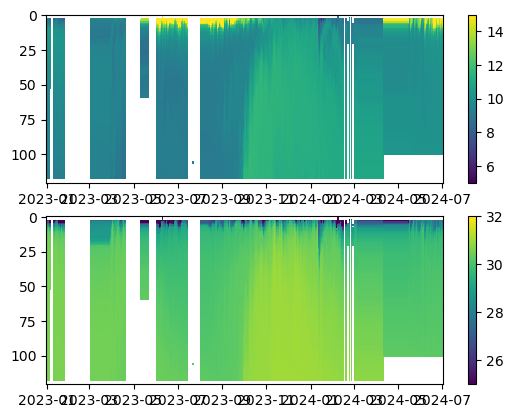

In [31]:
# Plot the full depth profile time series

fig, ax = plt.subplots(nrows=2)

ax1 = ax[0]
cb = ax1.pcolor(grid_data['cast_start_time'],
          grid_data['depth'],
          grid_data['sea_water_temperature'].T,
          vmin=5,vmax=15)
ax1.invert_yaxis()
fig.colorbar(cb, ax=ax1)

ax2 = ax[1]
cb = ax2.pcolor(grid_data['cast_start_time'],
          grid_data['depth'],
          grid_data['sea_water_practical_salinity'].T,
          vmin=25,vmax=32)
ax2.invert_yaxis()
fig.colorbar(cb, ax=ax2)

Text(0.5, 1.0, '40-60m sea water temperature time series')

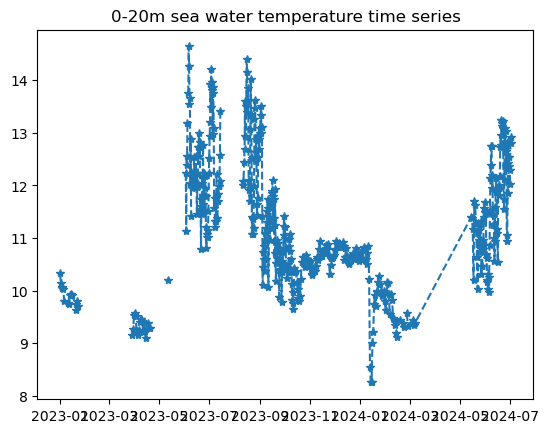

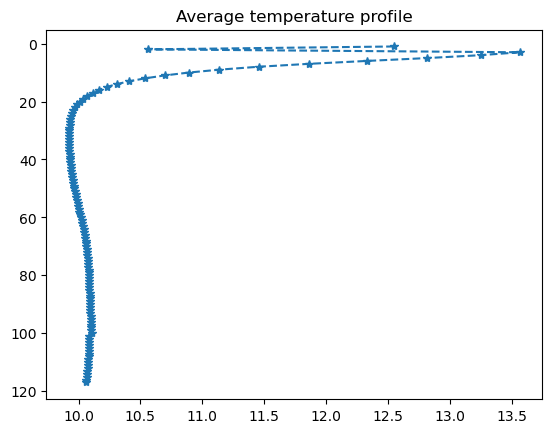

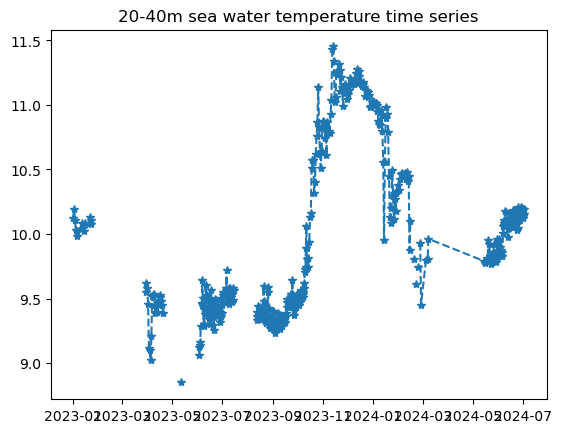

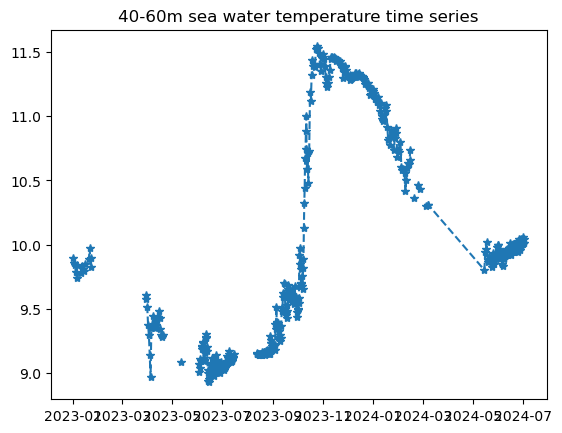

In [34]:
# Average the top 20 m of data, and make a time series

fig, ax = plt.subplots()
ax.plot(grid_data['cast_start_time'],
        np.mean(grid_data['sea_water_temperature'][:,0:20],axis=1),
        '--*')
ax.set_title('0-20m sea water temperature time series')


fig, ax = plt.subplots()
ax.plot(np.mean(grid_data['sea_water_temperature'],axis=0),
        grid_data['depth'],
        '--*')
ax.invert_yaxis()
ax.set_title('Average temperature profile')


fig, ax = plt.subplots()
ax.plot(grid_data['cast_start_time'],
        np.mean(grid_data['sea_water_temperature'][:,20:40],axis=1),
        '--*')
ax.set_title('20-40m sea water temperature time series')

fig, ax = plt.subplots()
ax.plot(grid_data['cast_start_time'],
        np.mean(grid_data['sea_water_temperature'][:,40:60],axis=1),
        '--*')
ax.set_title('40-60m sea water temperature time series')